# Preprocessing example in Sklearn



## code adapted from https://github.com/thomasjpfan/ml-workshop-intro

In [25]:
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.4,
              rc={"figure.constrained_layout.use": True,
                  "figure.figsize": [10, 6]})

In [26]:
import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


url = 'https://raw.githubusercontent.com/davidrkearney/colab-notebooks/main/datasets/strokes_training.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['stroke', 'id'], axis = 1), df['stroke']


X = X.select_dtypes(include='number')
X

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi
1,58.0,1,0,87.96,39.2
3,70.0,0,0,69.04,35.9
6,52.0,0,0,77.59,17.7
7,75.0,0,1,243.53,27.0
8,32.0,0,0,77.67,32.3
...,...,...,...,...,...
43395,10.0,0,0,58.64,20.4
43396,56.0,0,0,213.61,55.4
43397,82.0,1,0,91.94,28.9
43398,40.0,0,0,99.16,33.2


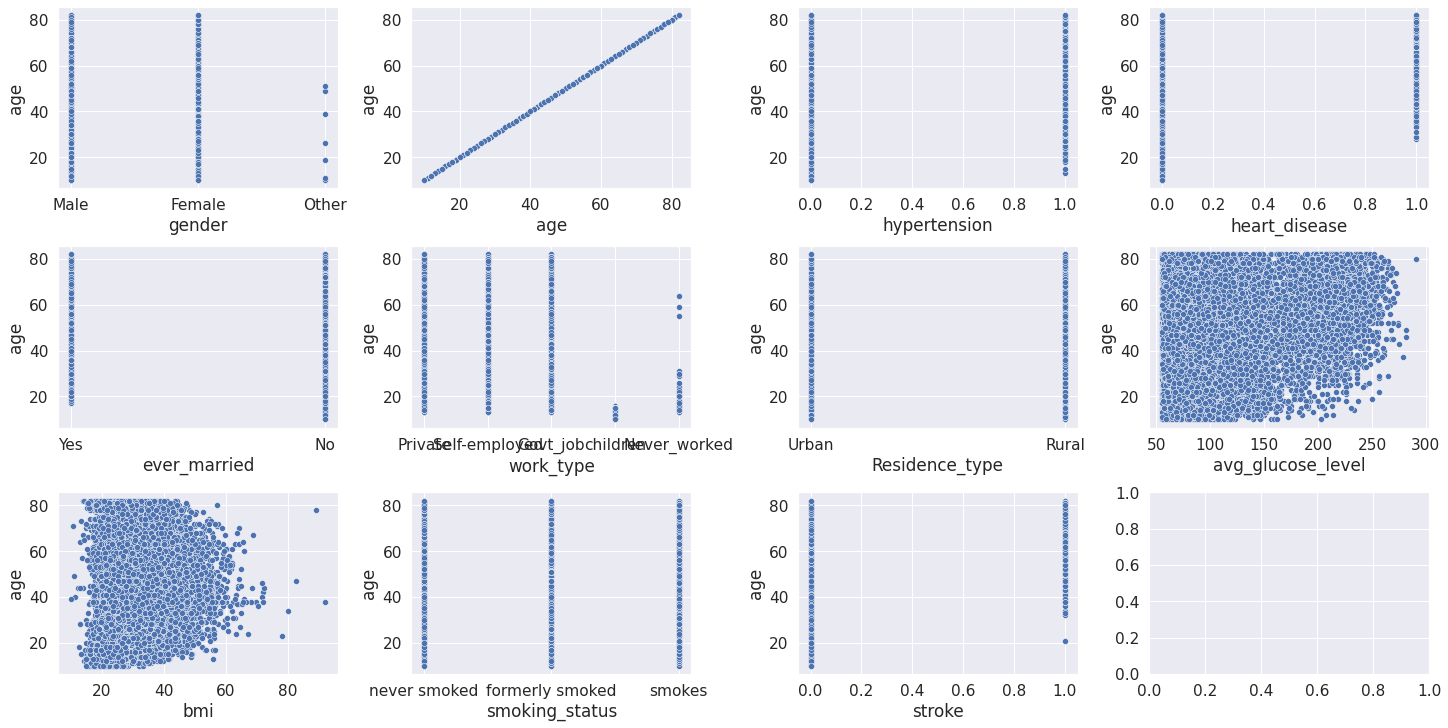

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(20, 10))

for name, ax in zip(df.drop(['id'], axis = 1), axes.ravel()):
    sns.scatterplot(x=name, y='age', ax=ax, data=df)

## Model without scaling

Remove categories for this example

In [41]:
feature_names = X.columns

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knr = KNeighborsClassifier().fit(X_train, y_train)
knr.score(X_train, y_train)

0.9810126582278481

In [64]:
knr.score(X_test, y_test)

0.9821133736929004

## Model with scaling

### Scale first!

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [66]:
import pandas as pd
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

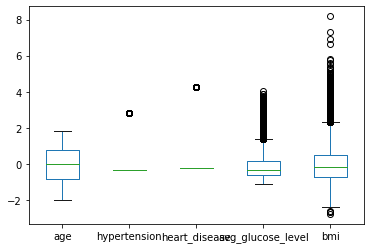

In [67]:
X_train_scaled_df.plot(kind='box');

### Train model on scaled data

In [68]:
knr = KNeighborsClassifier().fit(X_train_scaled, y_train)
knr.score(X_train_scaled, y_train)

0.9805081636396992

In [69]:
X_test_scaled = scaler.transform(X_test)
knr.score(X_test_scaled, y_test)

0.9815630159603742

In [70]:
# %load solutions/03-ex1-solution.py
from sklearn.svm import SVR

svr_unscaled = SVR()

svr_unscaled.fit(X_train, y_train)

svr_unscaled.score(X_test, y_test)

svr_scaled = SVR()
svr_scaled.fit(X_train_scaled, y_train)

svr_scaled.score(X_test_scaled, y_test)


-0.38405905025130793

## Tree based models

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train, y_train)
tree.score(X_test, y_test)

0.9822509631260319

In [57]:
tree_scaled = DecisionTreeClassifier(random_state=0, max_depth=3).fit(X_train_scaled, y_train)
tree_scaled.score(X_test_scaled, y_test)

0.9822509631260319

### Why are the scores the same?

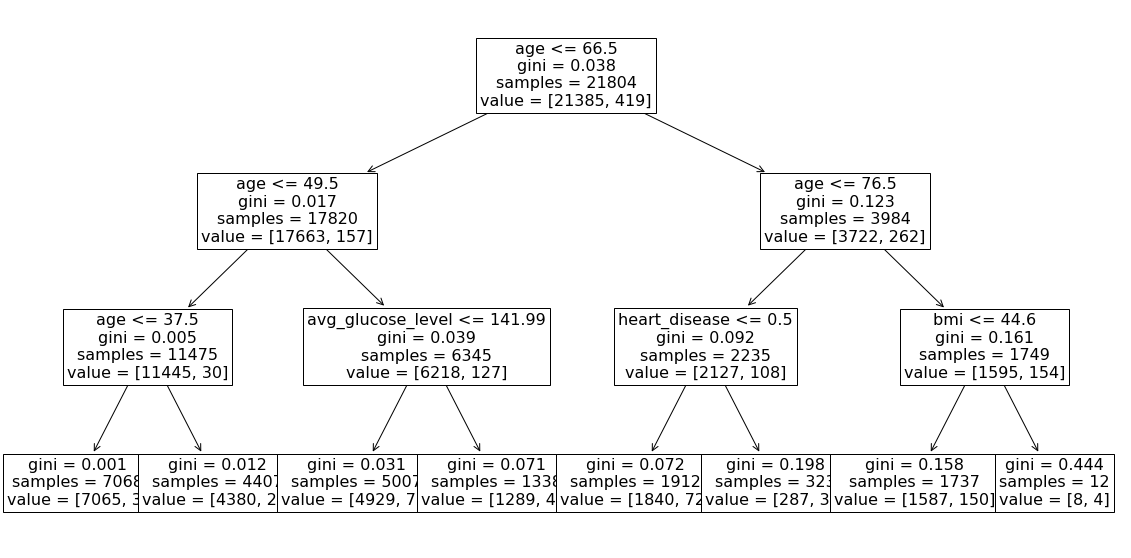

In [59]:
from sklearn.tree import plot_tree
sns.reset_orig()
fig, ax = plt.subplots(figsize=(20, 10))
_ = plot_tree(tree, ax=ax, fontsize=16, feature_names=feature_names)

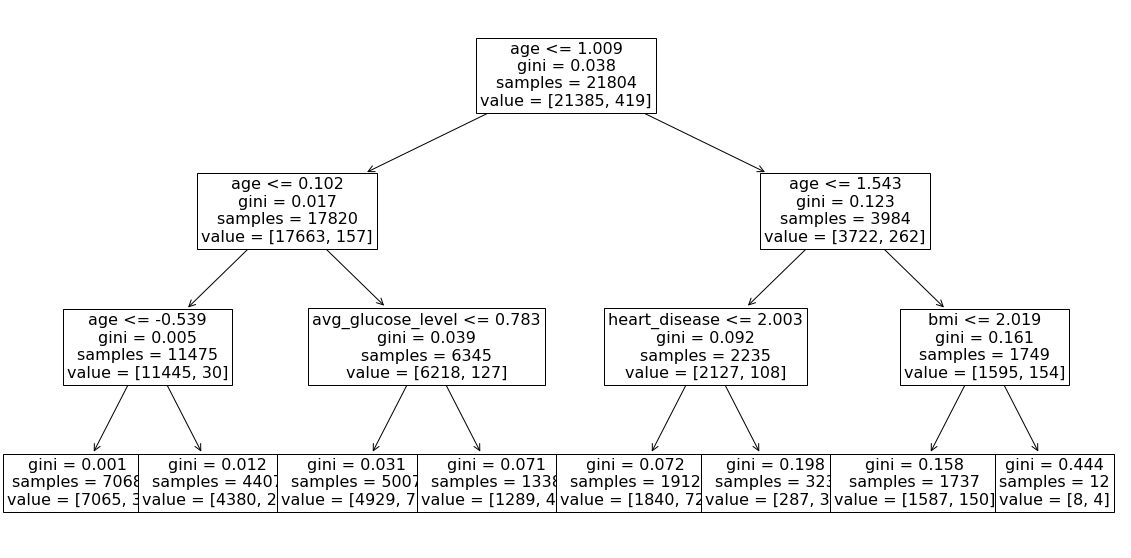

In [60]:
from sklearn.tree import plot_tree
sns.reset_orig()
fig, ax = plt.subplots(figsize=(20, 10))
_ = plot_tree(tree_scaled, ax=ax, fontsize=16, feature_names=feature_names)